In [22]:
# Import for OpenCV
import cv2

import numpy as np
import matplotlib.pyplot as plt 

In [23]:
image = cv2.imread("./images/giraf2.jpg")

# Check if the image is loaded
if image is None:
    print(" Error: Can't load the image")
else:
    print("Image Loaded Successfully.")


Image Loaded Successfully.


In [24]:
# Load the image and get it as greyscale
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [25]:
# Get the Histogram by flattening the image array
# Converts the 2D grayscale image into a 1D array. This is necessary because np.histogram() expects a 1D input.
# histogram(image_to_flat, num of bins, This is the range of values to consider when binning)
histogram, bins = np.histogram(img_grey.flatten(), 256, [0,256])

# Perform Histogram Equalization
equalized_img = cv2.equalizeHist(img_grey)

equalized_histogram, bins = np.histogram(equalized_img.flatten(), 256, [0,256])


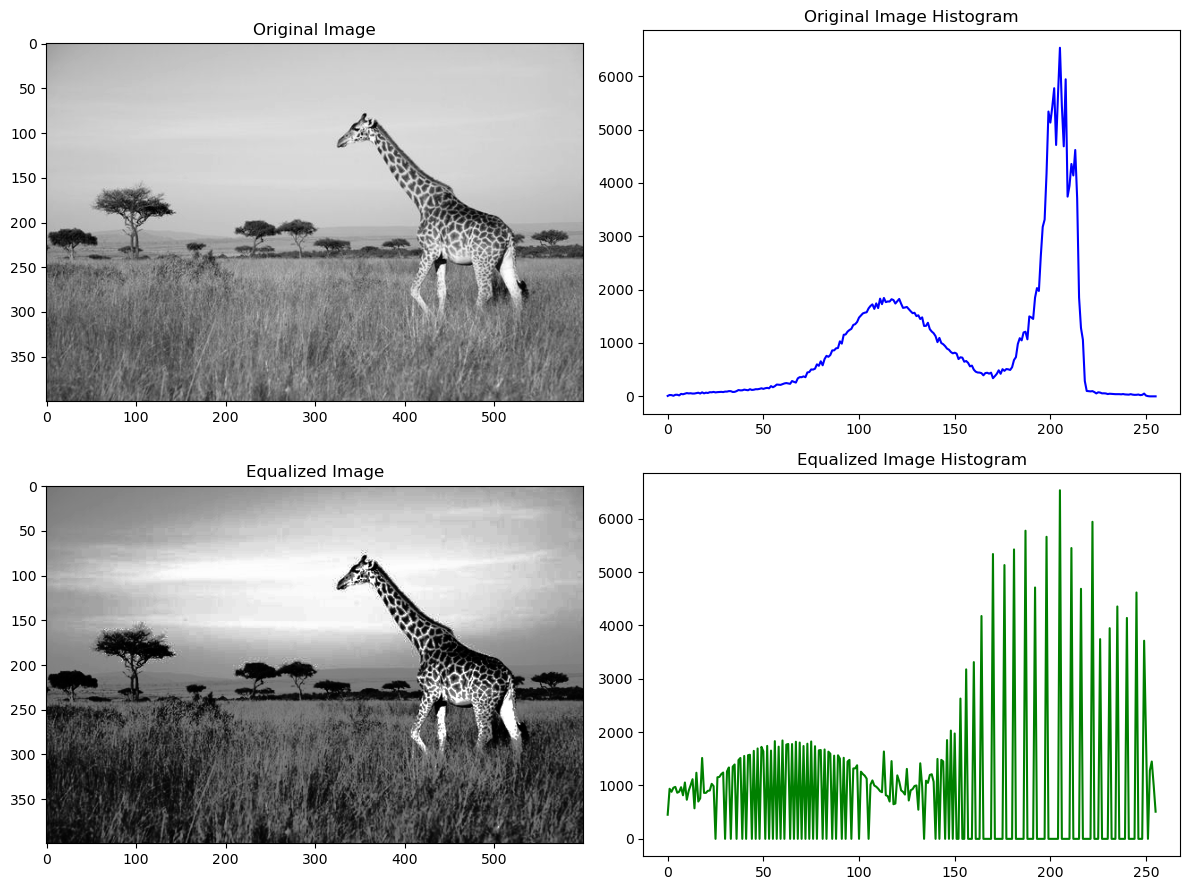

In [26]:
# Show all resized images with each algorithm
plt.figure(figsize=(12,9))

# Show the original Image
plt.subplot(2,2,1)
plt.imshow(img_grey,cmap='grey')
plt.title("Original Image")

# Show the original Image Histogram
plt.subplot(2,2,2)
plt.plot(histogram, color='blue') # or plt.bar(range(256), histogram)
plt.title("Original Image Histogram")

# Show the  Equalized Image
plt.subplot(2,2,3)
plt.imshow(equalized_img, cmap='grey')
plt.title("Equalized Image")

# Show the  Equalized Image Histogram
plt.subplot(2,2,4)
plt.plot(equalized_histogram,color='green')  # or plt.bar(range(256), equalized_histogram)
plt.title("Equalized Image Histogram")

plt.tight_layout()
plt.show()

## Further Explanations
------------------------

### 1. Original Image Histogram (Top-Right)

This histogram shows the **distribution of grayscale pixel intensities** in the original image.

- **X-axis**: Grayscale intensity levels (0 = black, 255 = white).  
- **Y-axis**: Number of pixels at each intensity.

**Interpretation:**

- The histogram is **heavily skewed to the right**, meaning the image contains mostly **bright pixels** (high intensity values).
- This is consistent with the **top-left image** — the giraffe scene appears a bit **washed out or low-contrast**, with fewer dark areas.
- There's a **cluster around 200+**, indicating that many pixels are **light gray/white**.

---

### 2. Equalized Image Histogram (Bottom-Right)

This histogram appears **after applying histogram equalization**, a contrast enhancement technique.

- It **spreads out pixel values** more evenly across the range [0, 255].
- The histogram becomes **more balanced** and covers a **wider range of intensities**.

**Interpretation:**

- The **bottom-left image** has **higher contrast** — dark areas look darker, and bright areas pop more.
- The histogram is **flatter** and occupies more of the intensity spectrum, which is the desired effect of equalization.
- It **improves visual details**, especially in regions that were previously too bright or too dark.

> As a result, **lighter areas may appear slightly darker**, and the **overall image gains depth and detail**.


In [32]:
# Create Equalized image with RGB with YUV colors
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

equalized_color_image = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
equalized_color_image_RGB = cv2.cvtColor(equalized_color_image, cv2.COLOR_BGR2RGB)



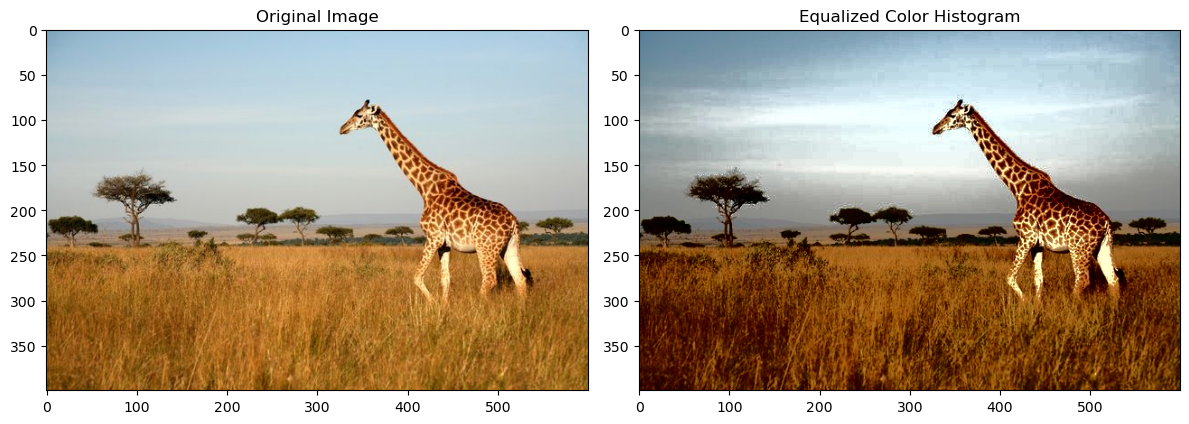

In [33]:
# Show all resized images with each algorithm
plt.figure(figsize=(12,9))

# Show the original Image
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")

# Show the  Equalized RGB Image Histogram
plt.subplot(1,2,2)
plt.imshow(equalized_color_image_RGB) 
plt.title("Equalized Color Histogram")

plt.tight_layout()
plt.show()